## BE485, Lab 10, Ex 1
 In this exercise:<br>
 a) Read jpg/png images<br>
 b) Reproject from Lat/Lon to Sinusoidal<br>
 c) reverse project
 

In [1]:
# import libraries
# Import Python 3's print function and division
from __future__ import print_function, division
# Import all necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.image as mpimg

import copy
import os
import math

#Import the new Library 
import viplab_lib5 as vip

# This is a magic function call that renders the figure inside the notebook
# instead of displaying a dump of the figure object in a separate window
%matplotlib inline

#Know where you are inside your file system
print (os.getcwd())

C:\Users\theboss\BE485\Lab\Lab_10_Code


## 1. Load Image and display

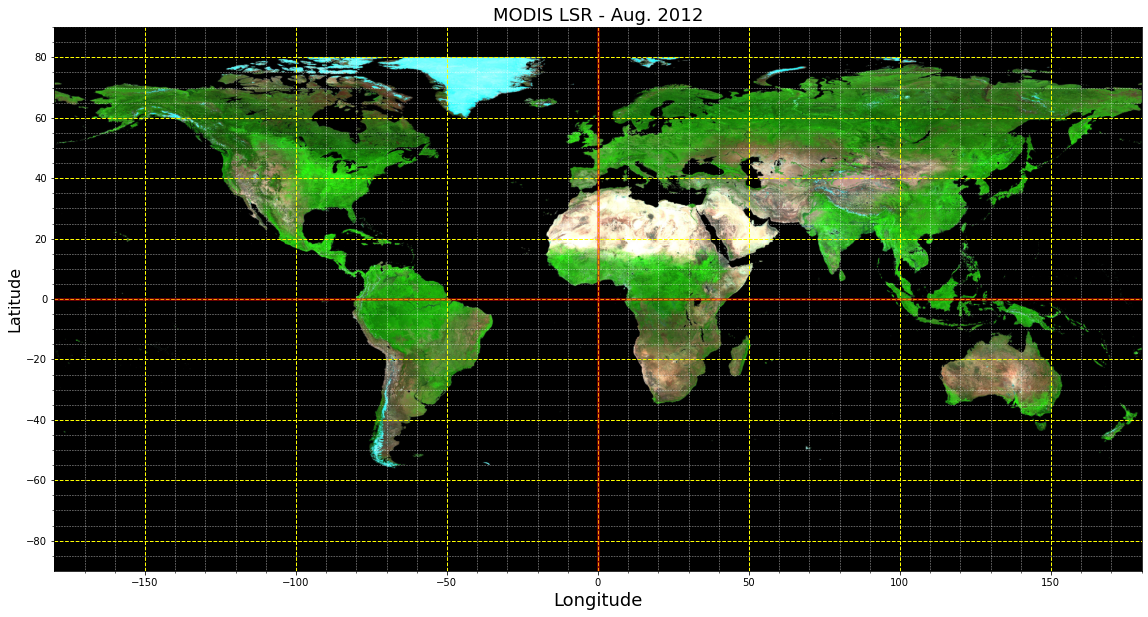

In [6]:
# (1) Import the file to be analyzed!
Globe_RGB = plt.imread('./Data/MODIS_LSR_August_2012.jpg')
fig = plt.figure(figsize=(20,10))

#Show an image with user defined axis extent 
plt.imshow(Globe_RGB, extent=[-180, 180, -90, 90])

# Turn grid on for both major and minor ticks and style minor slightly
# differently.

# Turn on minor TICKS, which are required by minor GRID
plt.minorticks_on()
plt.grid(which='major', linestyle='--',linewidth='1', color='yellow')
plt.grid(which='minor', linestyle=':', linewidth='0.6', color='white')

plt.title("MODIS LSR - Aug. 2012",fontsize=18)
plt.xlabel("Longitude", fontsize=18)
plt.ylabel("Latitude", fontsize=16)


# Plot the Equator and Central Meridian 
Eq_x = [-180, 180]
Eq_y = [0, 0]

CM_x = [0, 0]
CM_y = [-90, 90]


plt.plot(Eq_x, Eq_y, color="red", linewidth=3,alpha=0.4)
plt.plot(CM_x, CM_y, color="red", linewidth=3,alpha=0.4)

#Show Canvas 
plt.show()

## 2. Reproject Image from lat/lon to Sinusoidal

In [7]:
# Consult this Link/page for info on the sinusoidal projection
# https://mathworld.wolfram.com/SinusoidalProjection.html

# Create an emty array 
Sin_Img = np.zeros((3600,7200, 3), dtype=np.uint8)

#define ocation of the central meridian 
iCol_Meridian=3600

# Reproject the data
for iRow in range(Globe_RGB.shape[0]):
    Lat_Rad = math.radians(90-(iRow/20))
    for iCol in range(Globe_RGB.shape[1]):
        Sin_X=int((iCol-iCol_Meridian)*math.cos(Lat_Rad))
        Sin_X=int(Sin_X + iCol_Meridian)
        Sin_Img[iRow,Sin_X,0]=Globe_RGB[iRow,iCol,0]
        Sin_Img[iRow,Sin_X,1]=Globe_RGB[iRow,iCol,1]
        Sin_Img[iRow,Sin_X,2]=Globe_RGB[iRow,iCol,2]

## 3. Display Reprojected Image

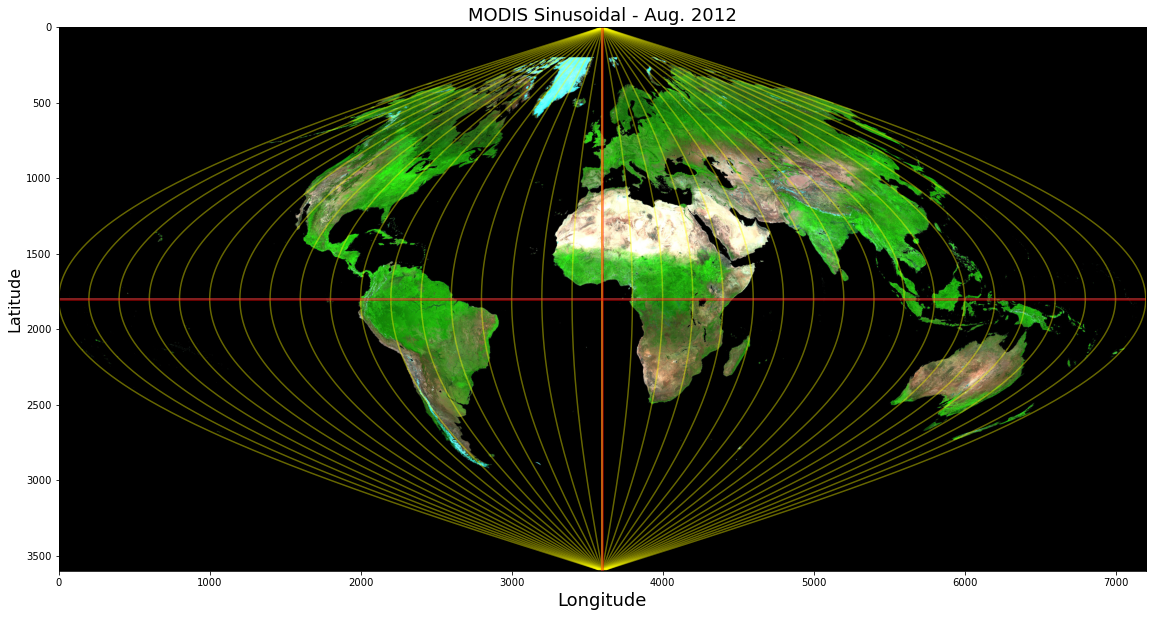

In [9]:
fig = plt.figure(figsize=(20,10))
plt.imshow(Sin_Img)

plt.plot([0, 7199],[1799, 1799], 'k-', color='white',lw=2,alpha=0.2)
plt.plot([3599,3599],[0, 3599], 'k-',color='white',lw=2,alpha=0.2)

y = np.arange(0, 3600, 10)

#Plot the longitude lines
for iStep in range(0,19):
    s1 = 3599+(iStep)*200*np.sin(np.pi * y/3600)
    s2 = 3599-(iStep)*200*np.sin(np.pi * y/3600)

    plt.plot(s1, y,color='yellow', alpha=0.4)
    plt.plot(s2, y,color='yellow', alpha=0.4)


plt.title("MODIS Sinusoidal - Aug. 2012",fontsize=18)
plt.xlabel("Longitude", fontsize=18)
plt.ylabel("Latitude", fontsize=16)
plt.margins(0)


# Plot the Equator and Central Meridian 
Eq_x = [0, 7200]
Eq_y = [1800, 1800]

CM_x = [3600, 3600]
CM_y = [0, 3600]


plt.plot(Eq_x, Eq_y, color="red", linewidth=3,alpha=0.4)
plt.plot(CM_x, CM_y, color="red", linewidth=3,alpha=0.4)



plt.show()

#### <font color="red">4. Homework: Now from Sinusoidal to Lat/Lon</font>

### a) Read png image and display it

In [10]:
#put here your code to read AQUA.A2016183.NDVI.png and display it

### b) Transforming from Sinusoidal to Lat/long

In [11]:
#put here your code to unproject the image

### c) Sinusoidal Image

In [12]:
#put here your code to display the unprojected image

### <font color="blue">d) Extra work</font>
## Extract two small windows of the same size (ex: 3x3) from each image at the same Geographic (lat-Lon) location and compare them.

In [17]:
print("program ended.")

program ended.
